In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bc = pd.read_csv('Bank Customer Churn Prediction.csv')
#Basic dataset review
print(bc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [82]:
print(bc.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [83]:
print(bc.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [84]:
#Total number of clients that churned
bc["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

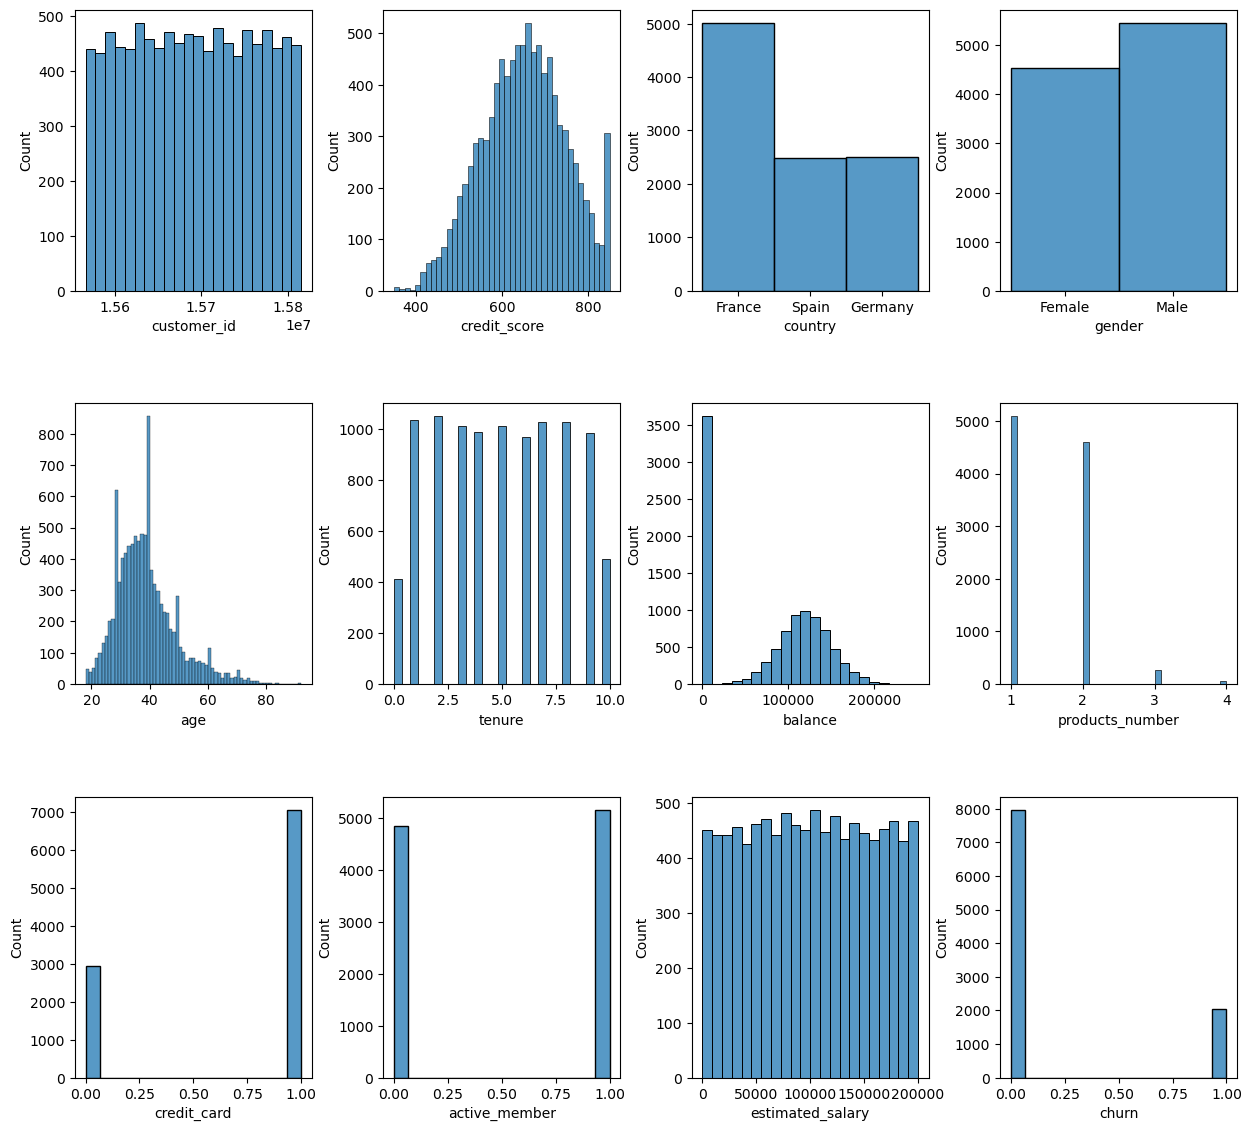

In [85]:
#Overall distribution for each variable
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(bc.columns, ax.flatten()):
  sns.histplot(bc[variable], ax=subplot)

#Most clients have 1 or 2 products. Nearly half of the clients are active. Nearly 70% of clients have a credit card.  

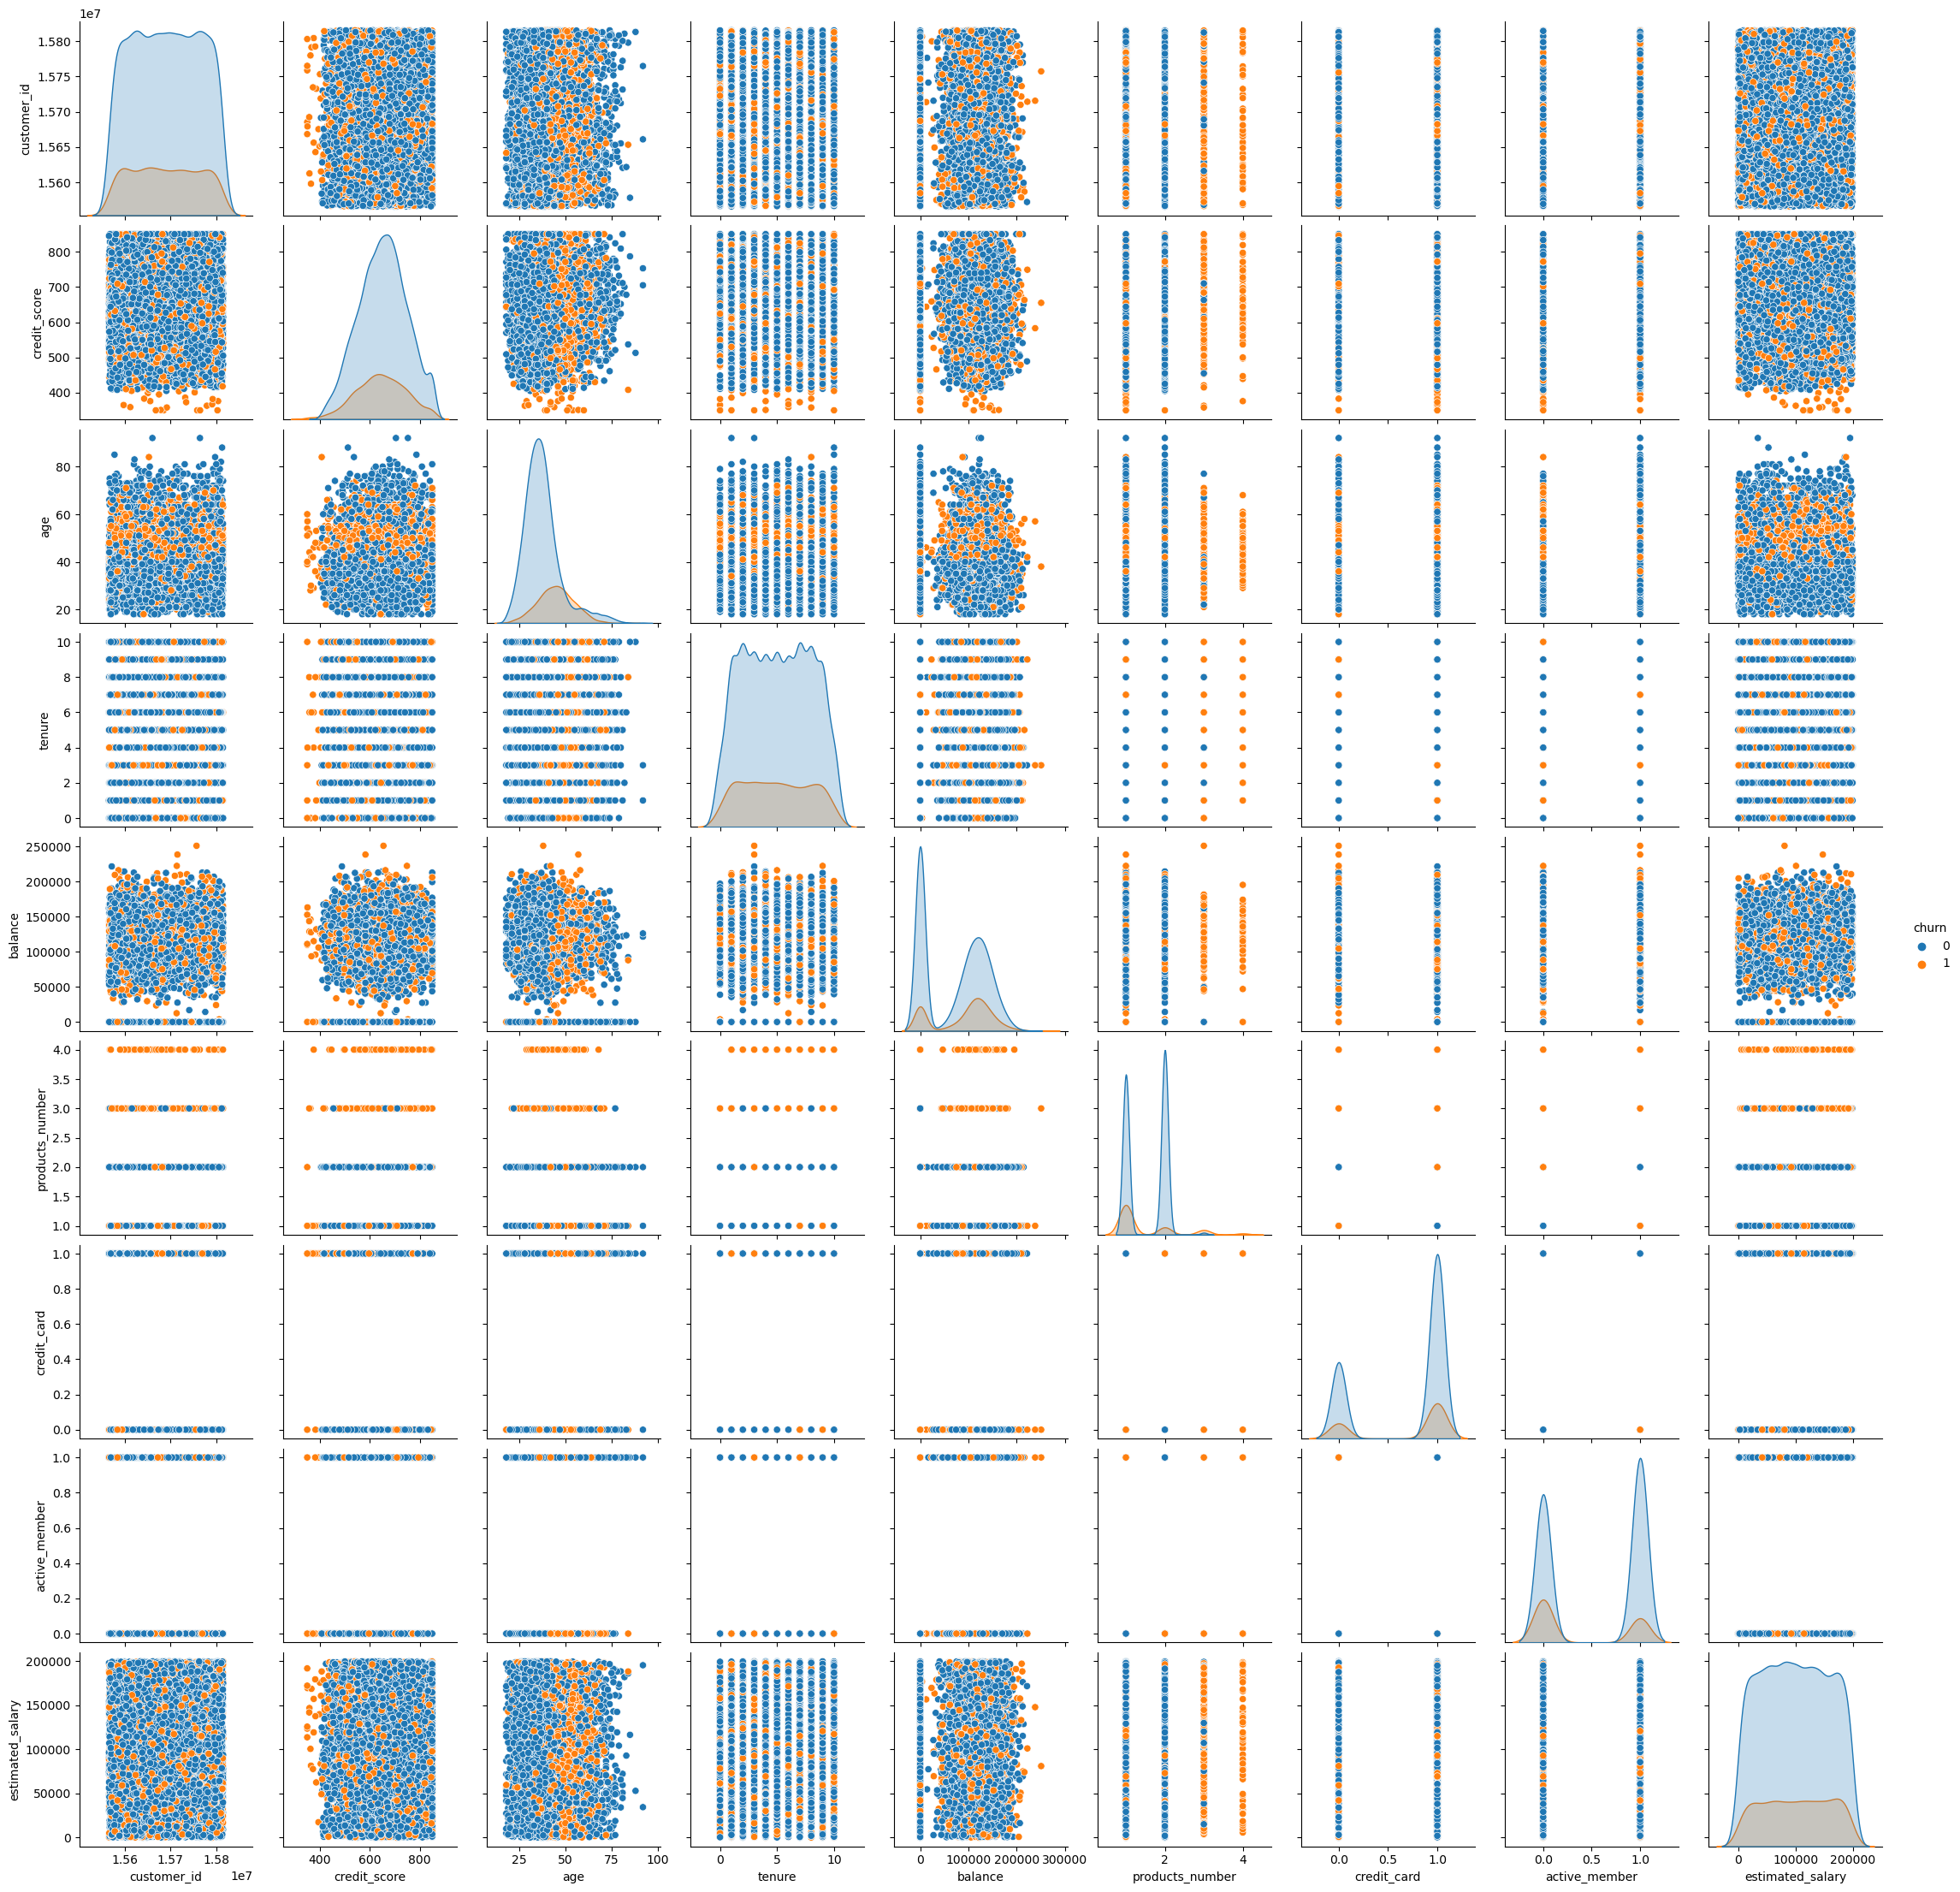

In [86]:
#Variables plotted with each other
sns.pairplot(bc, hue='churn')
plt.show()

#Churn seems to be highest around the age of 50. Churn is much higher for clients with fewer products (1 or 2). Being an active member seems to reduce churn.

C:\Users\dusti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dusti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


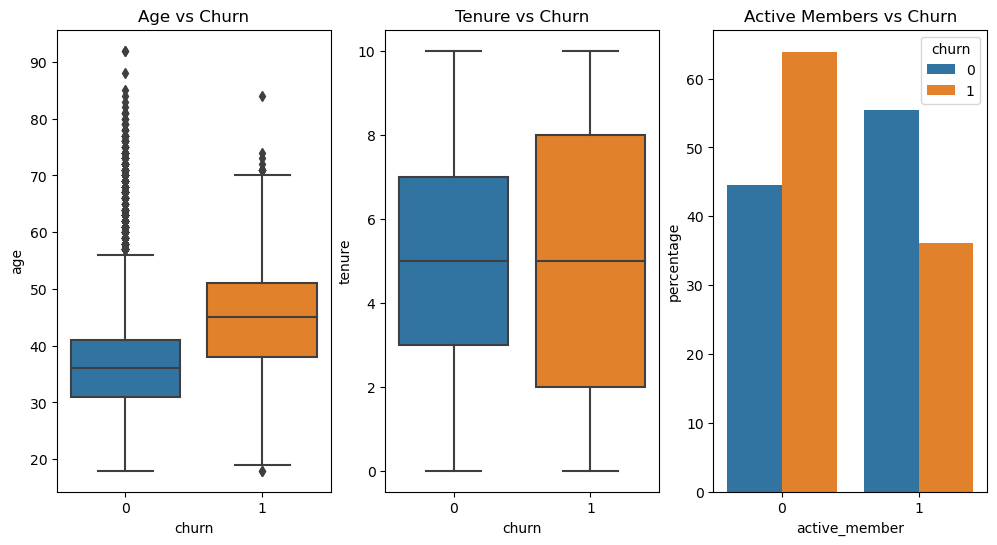

In [87]:
#Churn boxplots for Tenure, Age, # of Products
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
## The median churn age is around 45 whereas the median for non-churners are around 35.
plt.subplot(1,3,1)
sns.boxplot(bc['churn'], bc['age'])
plt.title('Age vs Churn')

#The median tenure for churn vs non-churn is the same but the interquartile range for churners is larger.
plt.subplot(1,3,2)
sns.boxplot(bc['churn'], bc['tenure'])
plt.title('Tenure vs Churn')

#A larger percentage of clients who churn are not active members.
plt.subplot(1,3,3)
counts = (bc.groupby(['churn'])['active_member']
  .value_counts(normalize=True)
  .rename('percentage')
  .mul(100)
  .reset_index())
plot = sns.barplot(x="active_member", y="percentage", hue="churn", data=counts).set_title('Active Members vs Churn')

[Text(0.5, 1.0, 'Product Count vs Churn')]

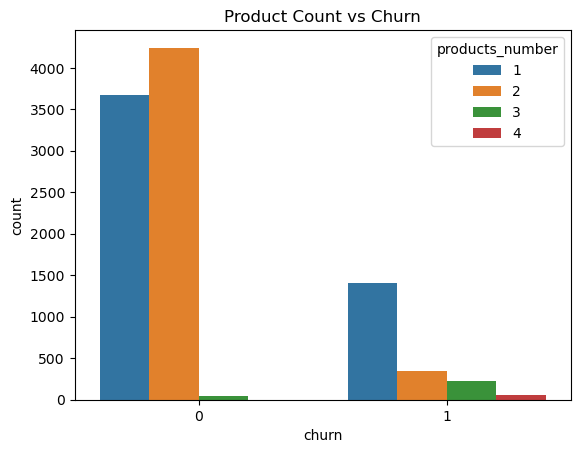

In [88]:
sns.countplot(x='churn',hue='products_number',data=bc).set(title="Product Count vs Churn")
#Most clients who left had only 1 or 2 products.


In [89]:
corrbc = bc.corr()
print(corrbc)
#The largest correlations with churn are age(0.285), balance(0.118), and active_member(-0.156).

                  customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score          

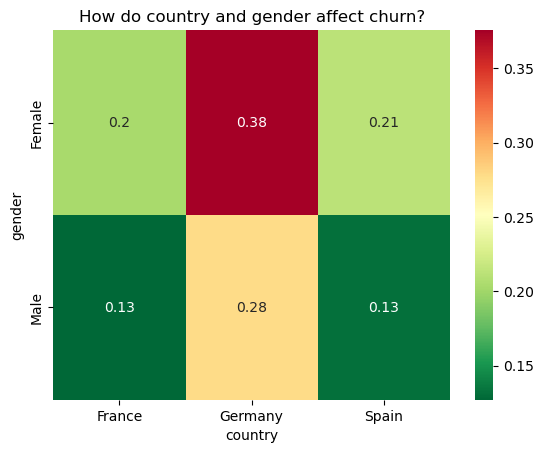

In [90]:
#Pivot table
result = pd.pivot_table(data=bc, index='gender', 
columns='country',values='churn')
##Heat map for gender/country vs churn
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How do country and gender affect churn?')
plt.show()

#Women are leaving at a higher rate than men, and Germany overall has a higher churn rate than the other two countries.

In [91]:
#Isolating non-numeric variables.
cat_features = bc.drop(['customer_id','credit_score','age','tenure','balance', 'products_number','credit_card','active_member','estimated_salary','churn'],axis=1)
cat_features.head()

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [92]:
#Converting country / gender into number values.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
bc_cat = cat_features.apply(le.fit_transform)
bc_cat.head()

,country,gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [93]:
#Merging with numeric variables.
num_features = bc[['customer_id','credit_score','age','tenure','balance', 'products_number','credit_card','active_member','estimated_salary','churn']]
finalbankchurn = pd.merge(num_features, bc_cat, left_index=True, right_index=True)
print(finalbankchurn.head())

   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country  gender  
0            1              1         101348.88      1        0       0  
1            0              1         112542.58      0        2       0  
2            1              0         113931.57      1        0       0  
3            0              0          93826.63      0        0       0  
4            1              1          79084.10      0        2       0  


In [94]:
finalbc = finalbankchurn.drop(['customer_id'],axis=1)
variables=['credit_score','age','tenure','balance', 'products_number','credit_card','active_member','estimated_salary','country','gender']
print(finalbc)

      credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  churn  country  gender  
0                 1    

In [95]:
#Split data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
X = finalbc.drop('churn', axis=1)
y = finalbc['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Test different classification models.
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred_clf)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred_clf)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred_clf)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred_clf, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.7973333333333333
precision:  0.39361702127659576
recall:  0.06292517006802721
f1_score:  0.7333465913915997


In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

acc_score = accuracy_score(y_test, y_pred_dtc)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred_dtc)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred_dtc)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred_dtc, average='weighted')
print("f1_score: ",f_score)
print(confusion_matrix(y_test, y_pred_dtc))

accuracy:  0.7933333333333333
precision:  0.4737704918032787
recall:  0.4914965986394558
f1_score:  0.7947575266009781
[[2091  321]
 [ 299  289]]


In [98]:
#Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.predict(X_test)
y_pred_svc = svc.predict(X_test)

acc_score = accuracy_score(y_test, y_pred_svc)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred_svc)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred_svc)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred_svc, average='weighted')
print("f1_score: ",f_score)
confusion_matrix(y_test, y_pred_svc)

accuracy:  0.804
precision:  0.0
recall:  0.0
f1_score:  0.7166474501108647


C:\Users\dusti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[2412,    0],
       [ 588,    0]], dtype=int64)

In [99]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

acc_score = accuracy_score(y_test, y_pred_rfc)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred_rfc)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred_rfc)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred_rfc, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.8583333333333333
precision:  0.7150395778364116
recall:  0.4608843537414966
f1_score:  0.8459653772177055


In [100]:
confusion_matrix(y_test, y_pred_rfc)

array([[2304,  108],
       [ 317,  271]], dtype=int64)

<AxesSubplot:>

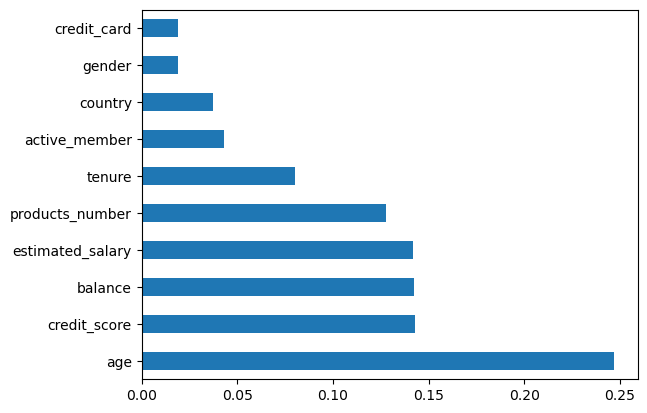

In [101]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

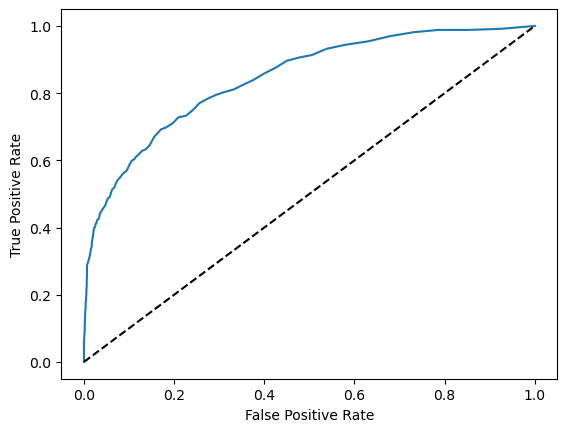

In [102]:
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [103]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))
#I plotted the ROC (Receiver Operating Characteristic) and my AUC was 0.844 which is a good score so this model is a good model to use.

0.8441550749653095


In [104]:
#The RandomForestclassifier produced the bext fit model. It has the highest accuracy overall with nearly 86% and the highest F1-Score with nearly 85%. The most important variable is Age. A plan to specifically target older demographics could cut down on churn significantly. Estimated salary, balance, credit score are also important variables to consider.